# 基本图表的绘制及应用场景

In [21]:
# 用于在jupyter中进行绘图
%matplotlib notebook
# %matplotlib inline

## 1. Matplotlib架构

In [22]:
# Backend

import matplotlib as mpl
mpl.get_backend()

'nbAgg'

## 2. 基本图表的绘制

In [23]:
import matplotlib.pyplot as plt

### 使用[matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html)直接绘制

<IPython.core.display.Javascript object>


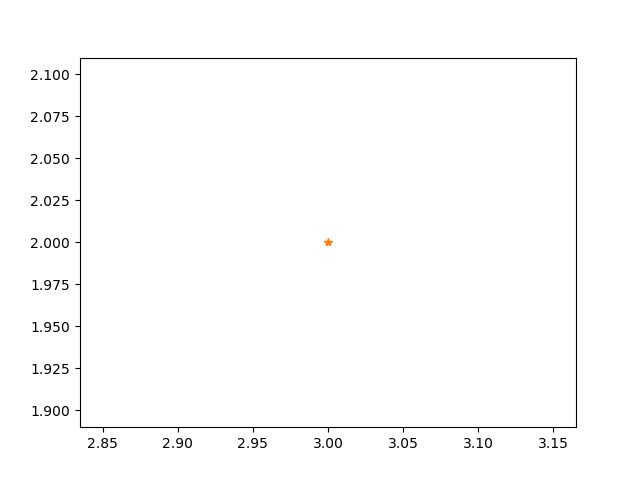

In [24]:
plt.plot(3, 2)

In [25]:
plt.plot(3, 2, '*')

### 使用scripting 层绘制 

In [26]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')

### [gca](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)获取当前坐标轴对象

<IPython.core.display.Javascript object>


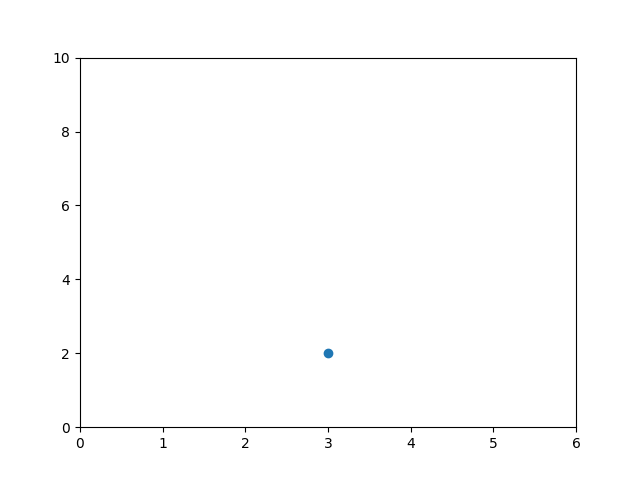

[0, 6, 0, 10]

In [27]:
plt.figure()
plt.plot(3, 2, 'o')
ax = plt.gca()
# 设置坐标轴范围
ax.axis([0, 6, 0, 10])

<IPython.core.display.Javascript object>


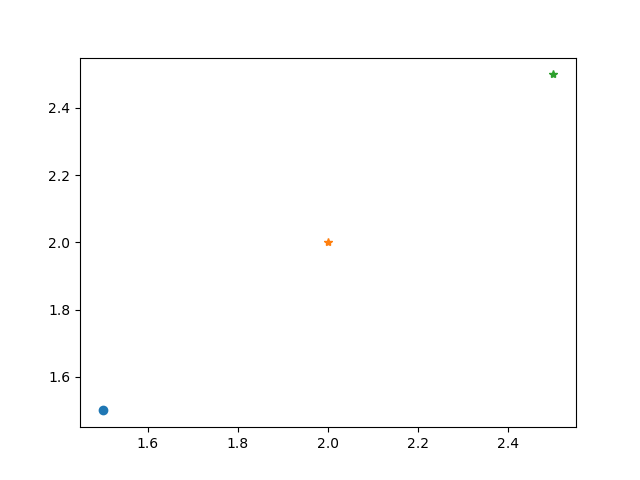

In [28]:
# matplot 会自动用颜色区分不同的数据
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, '*')
plt.plot(2.5, 2.5, '*')

## 3. [散点图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.scatter)

<IPython.core.display.Javascript object>


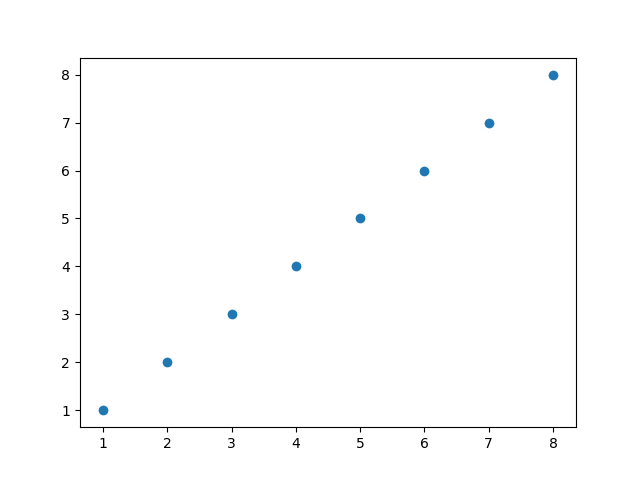

In [29]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y)

<IPython.core.display.Javascript object>


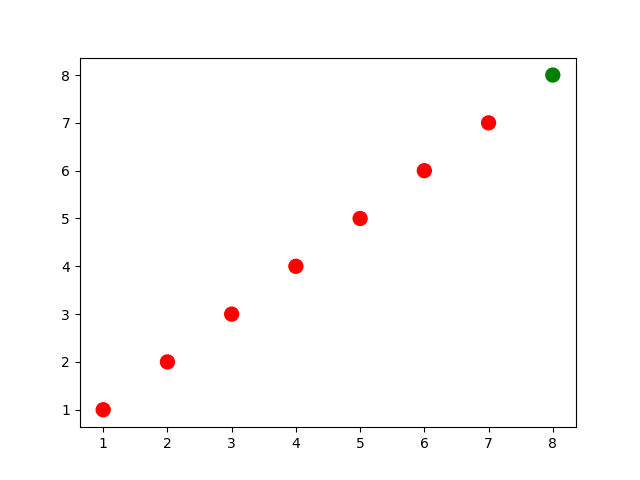

In [30]:
# 改变颜色及大小

import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
colors = ['red'] * (len(x) - 1)
colors.append('green')

plt.figure()
plt.scatter(x, y, s=100, c=colors)

In [31]:
# 使用zip合并两个列表为一个新列表
# 新列表中的每个元素为对应位置上的元组
l1 = list(range(1, 6))
l2 = list(range(6, 11))
zip_generator = zip(l1, l2)
tuple_list = list(zip_generator)
print(type(zip_generator))
print(list(tuple_list))

<class 'zip'>
[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


In [32]:
# 使用*进行对元组列表解包
x, y = zip(*tuple_list)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


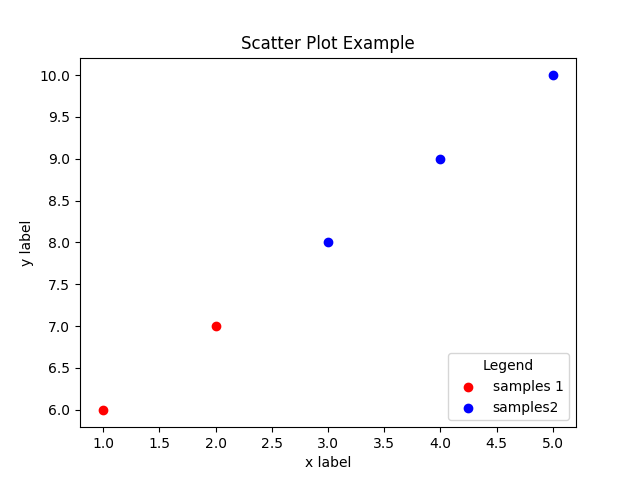

In [33]:
plt.figure()
plt.scatter(x[:2], y[:2], c='red', label='samples 1')
plt.scatter(x[2:], y[2:], c='blue', label='samples2')

In [34]:
# 添加坐标标签，标题
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Scatter Plot Example')

[Legend](https://matplotlib.org/users/legend_guide.html)

In [35]:
# 添加图例
# plt.legend()
# 4: 右下角
plt.legend(loc=4, frameon=True, title='Legend')

## 4. [线图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.plot)

<IPython.core.display.Javascript object>


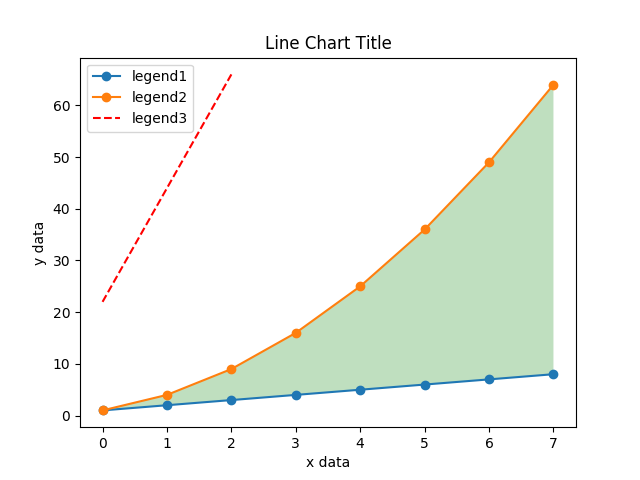

In [36]:
import numpy as np

linear_data = np.arange(1, 9)
quadratic_data = linear_data ** 2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

# 注意，这里我们只指定了y轴数据，x轴的数据是matplotlib自动生成的

In [37]:
plt.plot([22, 44, 66], '--r')

In [38]:
# 添加坐标轴标签及图例
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Line Chart Title')
plt.legend(['legend1', 'legend2', 'legend3'])

In [39]:
# 填充两个line间的区域
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data,
                      facecolor='green',
                      alpha=0.25)

<IPython.core.display.Javascript object>


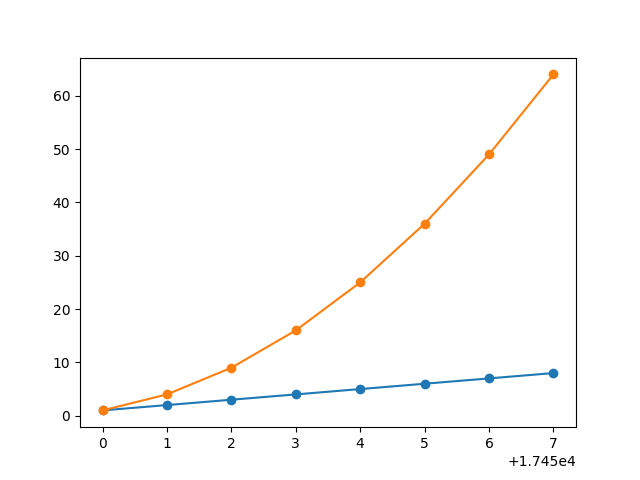

In [40]:
# 绘制横轴为时间的线图
plt.figure()
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
observation_dates
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')
# 横轴并不是我们想要的结果

<IPython.core.display.Javascript object>


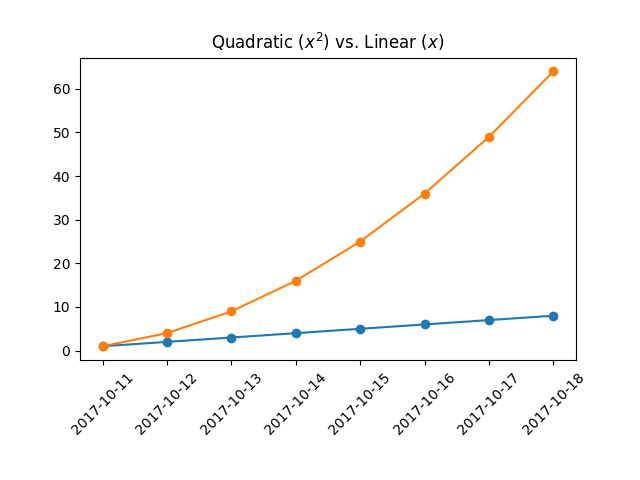

In [41]:
# 借助pandas绘制横轴为时间的线图
import pandas as pd
plt.figure()
observation_dates = np.arange('2017-10-11', '2017-10-19', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')


In [42]:
# plt.xticks(rotation='45')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [43]:
# 调整边界距离
plt.subplots_adjust(bottom=0.25)

In [44]:
# 对于学术制图，可在标题中包含latex语法
ax = plt.gca()
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$)')

## 5. [柱状图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20bar#matplotlib.pyplot.bar)

<IPython.core.display.Javascript object>


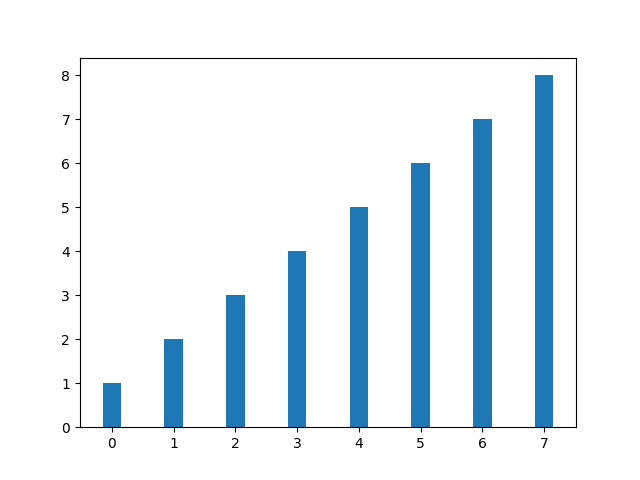

<Container object of 8 artists>

In [45]:
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)

In [41]:
# group bar chart
# 同一副图中添加新的柱状图
# 注意，为了不覆盖第一个柱状图，需要对x轴做偏移
x_vals2 = [item + 0.3 for item in x_vals]
plt.bar(x_vals2, quadratic_data, width=0.3)
    

<Container object of 8 artists>

<IPython.core.display.Javascript object>


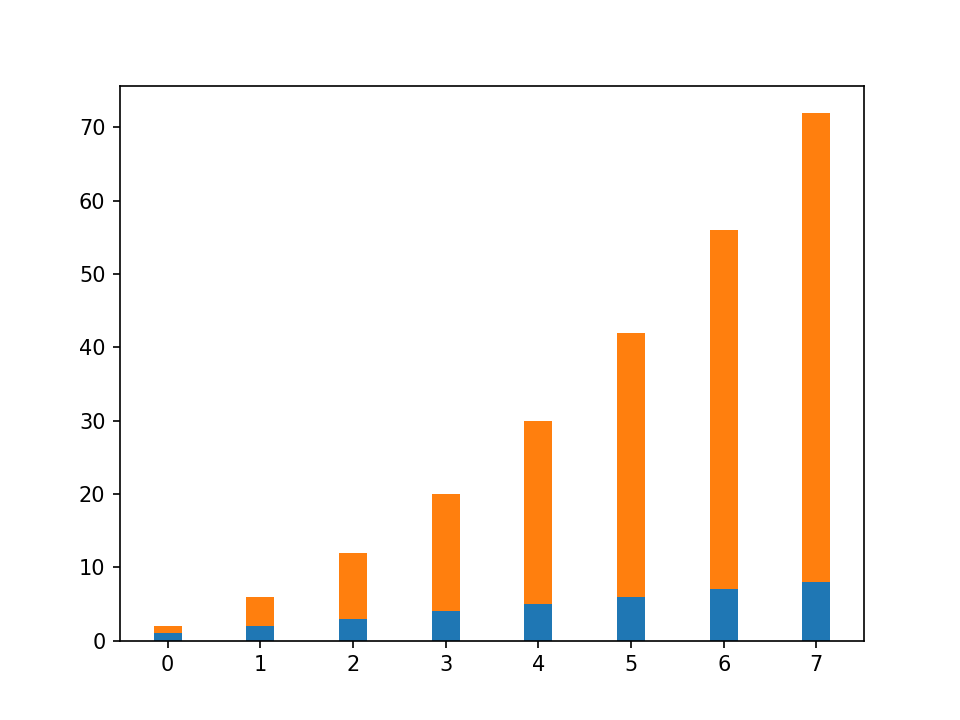

<Container object of 8 artists>

In [42]:
# stack bar chart
plt.figure()
x_vals = list(range(len(linear_data)))
plt.bar(x_vals, linear_data, width=0.3)
plt.bar(x_vals, quadratic_data, width=0.3, bottom=linear_data)

<IPython.core.display.Javascript object>


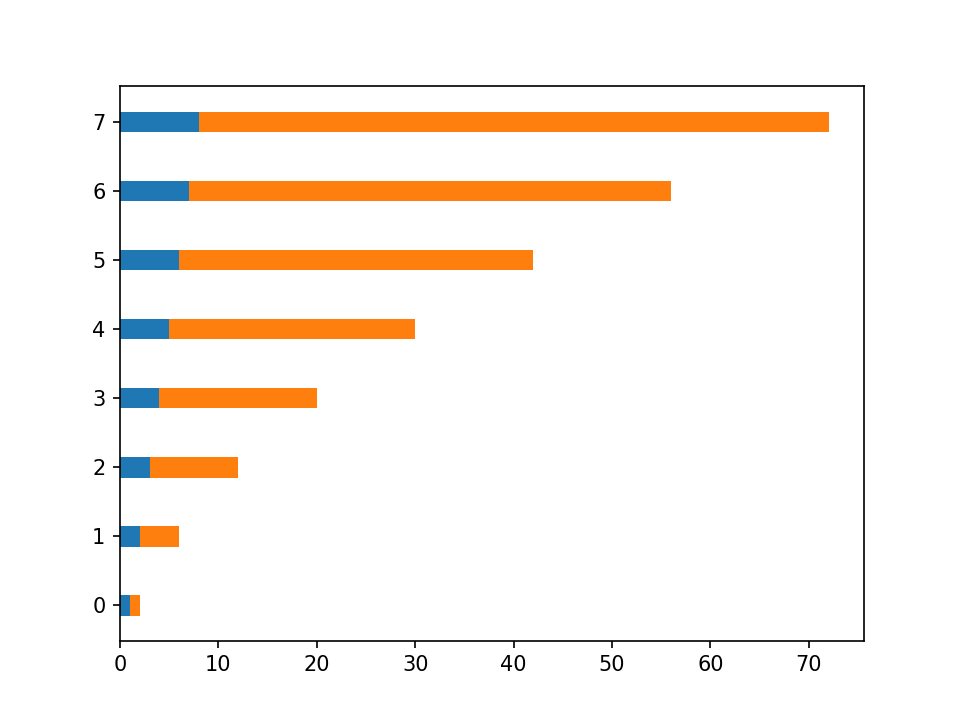

<Container object of 8 artists>

In [43]:
# 横向柱状图
plt.figure()
x_vals = list(range(len(linear_data)))
plt.barh(x_vals, linear_data, height=0.3)
plt.barh(x_vals, quadratic_data, height=0.3, left=linear_data)